In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import imageio
from svg2emf import svg2emf
Z = 20
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 1.4

In [2]:
def read_restime(fname):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    
    data = []
    for line in fl:
        if "@" not in line and "#" not in line:
            data.append(line)
    data = np.array(data, dtype='float')
    return data

def fade_colors(col_dic):
    return {key : tuple(v/1.5 for v in val) for key, val in col_dic.items()}

ion_labels = ['I0', 'I30', 'I70', 'I170']
np_labels = ['N20', 'N40', 'N60']
np_colors = {'N20':(0.0,0.0,1.0), 'N40':(0.6,0.0,0.6), 'N60':(1.0,0.0,0.3)}
ion_colors = {'I0':(0.8,0.1,0.1), 'I30':(0.1,0.7,0.1), 'I70':(0.1,0.1,0.8), 'I170':(1.0,0.7,0.0)}
faded_ion_colors = fade_colors(ion_colors)
faded_np_colors = fade_colors(np_colors)
data20 = [read_restime("T1_AA/RESTIMES/T1-N20-{}_AA_PRO1-5_restimes.sfu".format(ion)) for ion in ion_labels]
data40 = [read_restime("T1_AA/RESTIMES/T1-N40-{}_AA_PRO1-6_restimes.sfu".format(ion)) for ion in ion_labels]
data60 = [read_restime("T1_AA/RESTIMES/T1-N60-{}_AA_PRO1-6_restimes.sfu".format(ion)) for ion in ion_labels]
data = [data20, data40, data60]

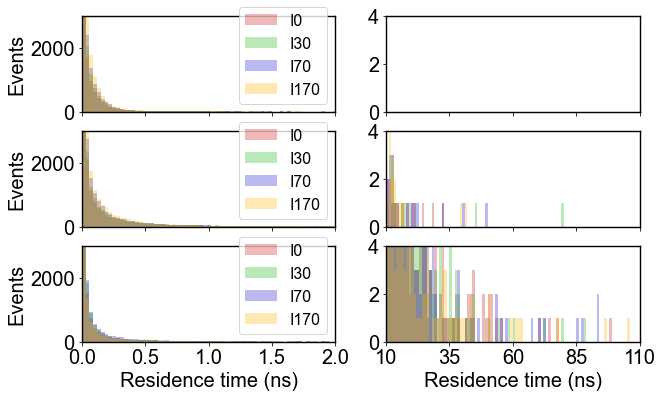

In [3]:
bins1 = np.linspace(0,3,101)
bins2 = np.linspace(10,110,101)
fig, axs = plt.subplots(figsize=(10,6), ncols=2, nrows=3, gridspec_kw={'hspace':0.2})
for ax_row, data_np in zip(axs, data):
    for ax, bins in zip(ax_row, (bins1, bins2)):
        ax.tick_params(labelsize=Z)
        for I, lab in zip(data_np, ion_labels):
            #print(colors[lab])
            ax.hist(I, bins=bins, alpha=0.3, color=ion_colors[lab], label=lab)
    ax_row[0].set_ylabel("Events", fontsize=Z)
    ax_row[0].set_xlim(0, 2)
    ax_row[0].set_ylim(0, 3000)
    ax_row[1].set_xlim(10,110)
    ax_row[1].set_ylim(0,4)
    ax_row[0].set_xticks(np.linspace(0,2,5))
    ax_row[0].set_xticklabels([])
    ax_row[1].set_xticks(np.linspace(10,110,5))
    ax_row[1].set_xticklabels([])
    ax_row[0].legend(fontsize=Z-4)
axs[-1,0].set_xticklabels(np.linspace(0,2,5))
axs[-1,1].set_xticklabels(np.linspace(10,110,5, dtype='int'))
axs[-1,0].set_xlabel("Residence time (ns)", fontsize=Z)
axs[-1,1].set_xlabel("Residence time (ns)", fontsize=Z)
plt.show()
plt.close()

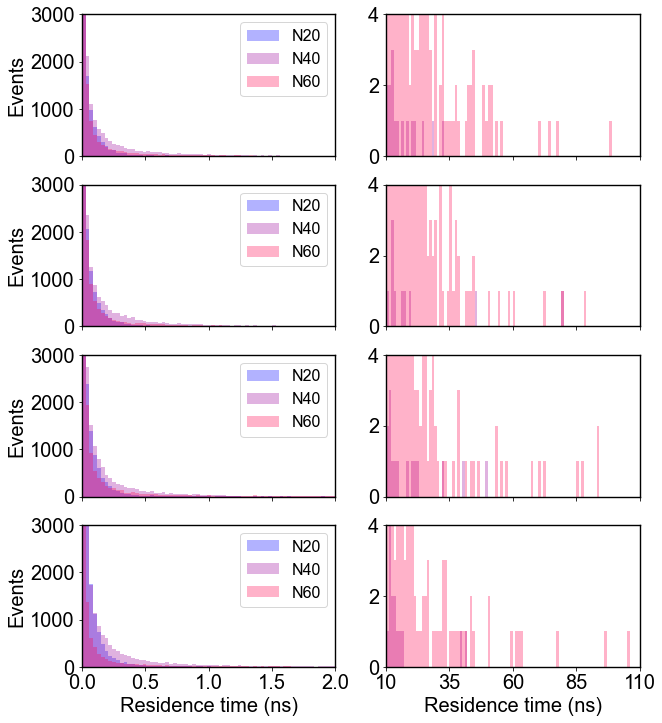

In [5]:
bins1 = np.linspace(0,3,101)
bins2 = np.linspace(10,110,101)
fig, axs = plt.subplots(figsize=(10,12), ncols=2, nrows=4, gridspec_kw={'hspace':0.2})
for ndx_i, (ax_row, I) in enumerate(zip(axs, ion_labels)):
    for ax, bins in zip(ax_row, (bins1, bins2)):
        ax.tick_params(labelsize=Z) 
        for data_np, lab in zip(data, np_labels):
            ax.hist(data_np[ndx_i], bins=bins, alpha=0.3, color=np_colors[lab], label=lab)
    ax_row[0].set_ylabel("Events", fontsize=Z)
    ax_row[0].set_xlim(0, 2)
    ax_row[0].set_ylim(0, 3000)
    ax_row[1].set_xlim(10,110)
    ax_row[1].set_ylim(0,4)
    ax_row[0].set_xticks(np.linspace(0,2,5))
    ax_row[0].set_xticklabels([])
    ax_row[1].set_xticks(np.linspace(10,110,5))
    ax_row[1].set_xticklabels([])
    ax_row[0].legend(fontsize=Z-4)
axs[-1,0].set_xticklabels(np.linspace(0,2,5))
axs[-1,1].set_xticklabels(np.linspace(10,110,5, dtype='int'))
axs[-1,0].set_xlabel("Residence time (ns)", fontsize=Z)
axs[-1,1].set_xlabel("Residence time (ns)", fontsize=Z)
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


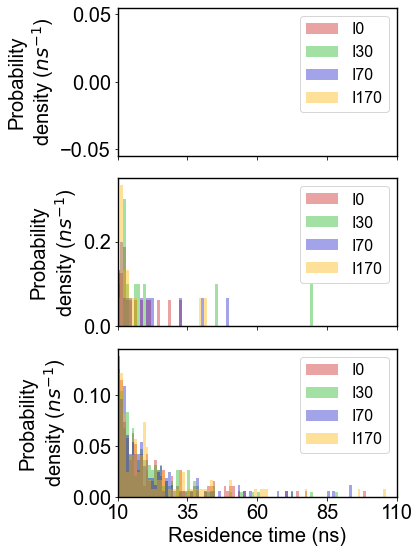

In [6]:
TLIM = 10
bins = np.linspace(TLIM,110,101)
fig, axs = plt.subplots(figsize=(5,9), ncols=1, nrows=3, gridspec_kw={'hspace':0.15})
for (data_np, ax) in zip(data, axs):
    ax.set_xlim(TLIM, 110)
    ax.tick_params(labelsize=Z)
    ax.set_ylabel("Probability\n"+r"density ($ns^{-1}$)", fontsize=Z)
    ax.set_xticks(np.linspace(10,110,5))
    ax.set_xticklabels([])
    for I, lab in zip(data_np, ion_labels):
        ax.hist(I[I>TLIM], bins=bins, alpha=0.4, color=ion_colors[lab], label=lab, density=True)
    ax.legend(fontsize=Z-4, loc='upper right')
axs[-1].set_xticklabels(np.linspace(10,110,5, dtype='int'))
axs[-1].set_xlabel("Residence time (ns)", fontsize=Z)
plt.show()
plt.close()

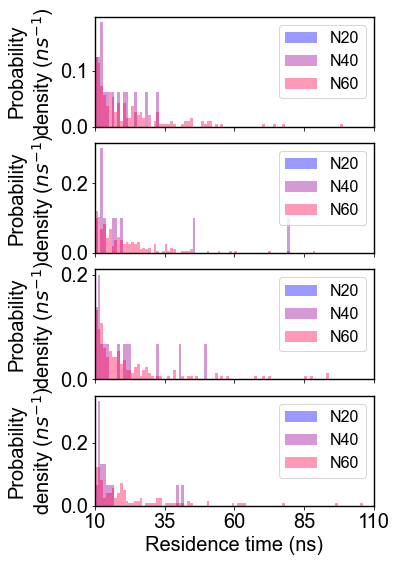

In [7]:
TLIM = 10
bins = np.linspace(TLIM,110,101)
fig, axs = plt.subplots(figsize=(5,9), ncols=1, nrows=4, gridspec_kw={'hspace':0.15})
for ndx_i, (I, ax) in enumerate(zip(ion_labels, axs)):
    ax.set_xlim(TLIM, 110)
    ax.tick_params(labelsize=Z)
    ax.set_ylabel("Probability\n"+r"density ($ns^{-1}$)", fontsize=Z)
    ax.set_xticks(np.linspace(10,110,5))
    ax.set_xticklabels([])
    for dnp, lab in zip(data, np_labels):
        ax.hist(dnp[ndx_i][dnp[ndx_i]>TLIM], bins=bins, alpha=0.4, color=np_colors[lab], label=lab, density=True)
    ax.legend(fontsize=Z-4, loc='upper right')
axs[-1].set_xticklabels(np.linspace(10,110,5, dtype='int'))
axs[-1].set_xlabel("Residence time (ns)", fontsize=Z)
plt.show()
plt.close()

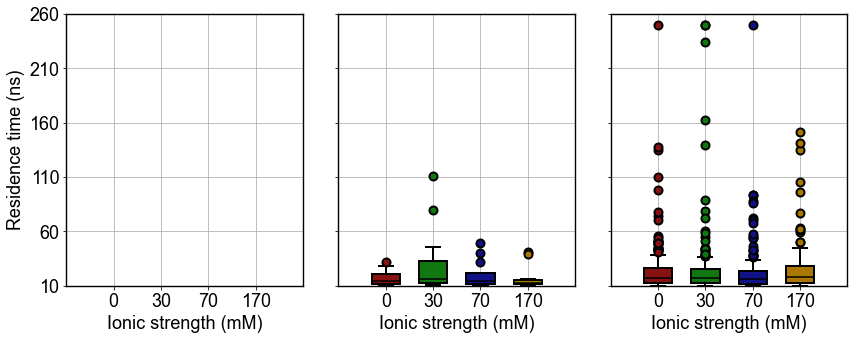

In [7]:
TLIM = 10 #ns, definition of long residence times

bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=2)
mp = dict(ls='-', lw=1.5,color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14,5), gridspec_kw={'wspace':0.15})
for nplab, data_np, ax in zip(np_labels, data, axs):
    #ax.set_title(nplab, fontsize=Z)
    ax.tick_params(labelsize=Z-2)
    for i, (I, lab) in enumerate(zip(data_np, ion_labels),1):
        bpl = ax.boxplot(I[I>TLIM], positions=[i], labels=[lab[1:]], widths=0.6, whis=1, patch_artist=True, boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp)
        bpl['boxes'][0].set_facecolor(faded_ion_colors[lab])
        bpl['fliers'][0].set_markerfacecolor(faded_ion_colors[lab])
    ax.set_xlim(0, i+1)
    ax.set_ylim(10, 250)
    ax.grid()
    ax.set_xlabel("Ionic strength (mM)", fontsize=Z-2)
    ax.set_yticks(np.linspace(10,260,6))
    ax.set_yticklabels([])
axs[0].set_ylabel("Residence time (ns)", fontsize=Z-2)
axs[0].set_yticklabels(np.linspace(10,260,6, dtype='int'))
#plt.tight_layout()
#plt.savefig("Restimes_AA.png", format='png', dpi=300, bbox_inches='tight')
plt.savefig("Restimes_AA.svg", format='svg', dpi=300, bbox_inches='tight')
svg2emf(r"Restimes_AA.svg")
plt.show()
plt.close()

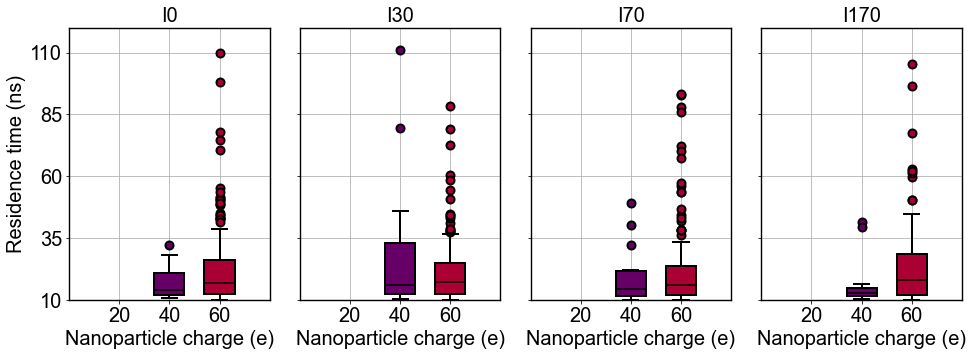

In [12]:
TLIM = 10 #ns, definition of long residence times

bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=2)
mp = dict(ls='-', lw=1.5,color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16,5), gridspec_kw={'wspace':0.15})
for ndx_i, (ilab, ax) in enumerate(zip(ion_labels, axs)):
    ax.set_title(ilab, fontsize=Z)
    ax.tick_params(labelsize=Z)
    for i, (data_np, lab) in enumerate(zip(data, np_labels), 1):
        dnp = data_np[ndx_i]
        bpl = ax.boxplot(dnp[dnp>TLIM], positions=[i], labels=[lab[1:]], widths=0.6, whis=1, patch_artist=True, boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp)
        bpl['boxes'][0].set_facecolor(faded_np_colors[lab])
        bpl['fliers'][0].set_markerfacecolor(faded_np_colors[lab])
    ax.set_xlim(0, i+1)
    ax.set_ylim(10, 120)
    ax.grid()
    ax.set_xlabel("Nanoparticle charge (e)", fontsize=Z)
    ax.set_yticks(np.linspace(10,110,5))
    ax.set_yticklabels([])
axs[0].set_ylabel("Residence time (ns)", fontsize=Z)
axs[0].set_yticklabels(np.linspace(10,110,5, dtype='int'))
plt.show()
plt.close()

In [13]:
def custom_vp(vp, faded_color, color):
    for pc in vp['bodies']:
        pc.set_facecolor(faded_color)
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)
        pc.set_linewidth(2)
    
    vp['cmins'].set_color(color)
    vp['cmins'].set_linewidth(2.5)
    vp['cmins'].set_alpha(1.0)
    
    vp['cmaxes'].set_color(color)
    vp['cmaxes'].set_linewidth(2.5)
    vp['cmaxes'].set_alpha(1.0)
    
    vp['cmedians'].set_color(color)
    vp['cmedians'].set_linewidth(2.5)
    vp['cmedians'].set_alpha(1.0)
    
    vp['cbars'].set_color(color)
    vp['cbars'].set_linewidth(2.5)
    vp['cbars'].set_alpha(1.0)
    

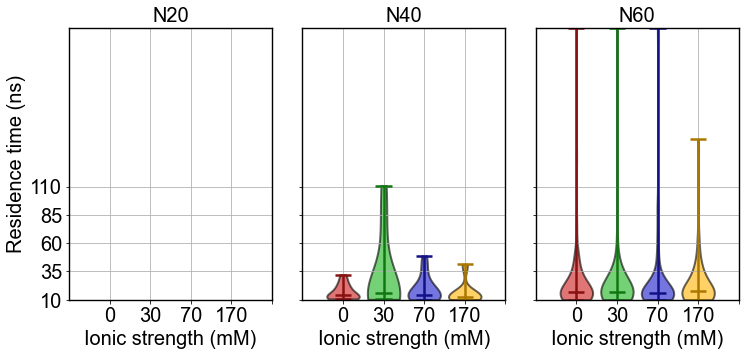

In [17]:
TLIM = 10 #ns, definition of long residence times

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5), gridspec_kw={'wspace':0.15})
for nplab, data_np, ax in zip(np_labels, data, axs):
    ax.set_title(nplab, fontsize=Z)
    ax.tick_params(labelsize=Z)
    for i, (I, lab) in enumerate(zip(data_np, ion_labels),1):
        if len(I[I>TLIM]) != 0:
            vp = ax.violinplot(I[I>TLIM], positions=[i], showmedians=True, widths=0.8)
            custom_vp(vp, ion_colors[lab], faded_ion_colors[lab])
    ax.set_xlim(0, i+1)
    ax.set_ylim(10, 250)
    ax.grid()
    ax.set_xticks(np.linspace(1,5,5,dtype='int'))
    ax.set_xticklabels([l[1:] for l in ion_labels])
    ax.set_xlabel("Ionic strength (mM)", fontsize=Z)
    ax.set_yticks(np.linspace(10,110,5))
    ax.set_yticklabels([])
axs[0].set_ylabel("Residence time (ns)", fontsize=Z)
axs[0].set_yticklabels(np.linspace(10,110,5, dtype='int'))
plt.show()
plt.close()

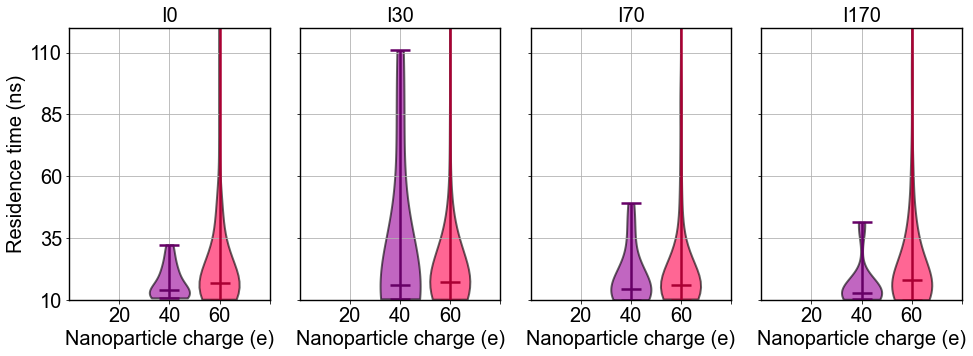

In [15]:
TLIM = 10 #ns, definition of long residence times

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16,5), gridspec_kw={'wspace':0.15})
for ndx_i, (ilab, ax) in enumerate(zip(ion_labels, axs)):
    ax.set_title(ilab, fontsize=Z)
    ax.tick_params(labelsize=Z)
    for i, (data_np, lab) in enumerate(zip(data, np_labels), 1):
        dnp = data_np[ndx_i]
        if len(dnp[dnp>TLIM]) != 0:
            vp = ax.violinplot(dnp[dnp>TLIM], positions=[i], showmedians=True, widths=0.8)
            custom_vp(vp, np_colors[lab], faded_np_colors[lab])
    ax.set_xlim(0, i+1)
    ax.set_ylim(10, 120)
    ax.grid()
    ax.set_xticks(np.linspace(1,4,4,dtype='int'))
    ax.set_xticklabels([l[1:] for l in np_labels])
    ax.set_xlabel("Nanoparticle charge (e)", fontsize=Z)
    ax.set_yticks(np.linspace(10,110,5))
    ax.set_yticklabels([])
axs[0].set_ylabel("Residence time (ns)", fontsize=Z)
axs[0].set_yticklabels(np.linspace(10,110,5, dtype='int'))
plt.show()
plt.close()